In [118]:
from hovor.configuration.json_configuration_provider import JsonConfigurationProvider
import jsonpickle
from pathlib import Path
from ipysigma import Sigma
import networkx as nx



In [119]:
output_files_path = "/home/qnc/Plan4Dial/plan4dial/plan4dial/local_data/conversation_alignment_bots/extended_ijcai/output_files"
configuration_provider = JsonConfigurationProvider(str(Path(output_files_path) / "data"))
json = jsonpickle.encode(configuration_provider)
configuration_provider = jsonpickle.decode(json)
# configuration_provider.check_all_action_builders()

In [120]:
print(configuration_provider)

In [121]:
plan = configuration_provider.plan

In [122]:
print(plan)

In [123]:
class Node: 
    def __init__(self, action_name, is_goal, is_initial, node_id) -> None:
        self.action_name = action_name
        self.is_goal = is_goal 
        self.is_initial = is_initial
        self.node_id = node_id
        self.group =  self._group()

    
    def _group(self): 
        if self.is_goal: 
            return  "goal"
        
        if self.is_initial: 
            return "initial"
        
        return "convo"
            
    
    def __repr__(self) -> str:
        return f"(action name: {self.action_name}, is_goal: {self.is_goal}, is_initial: {self.is_initial}, node_id: {self.node_id} )"

        
    

In [124]:
nodes = []
node_id_index = {}
for n in plan.nodes: 
    nodes.append(Node(n.action_name, n.is_goal, n.is_initial, n.node_id))
    node_id_index[n.node_id] = len(nodes)-1
print(nodes)

[(action name: ---, is_goal: True, is_initial: False, node_id: 0 ), (action name: complete, is_goal: False, is_initial: False, node_id: 1 ), (action name: get-electric_fire_instruction, is_goal: False, is_initial: False, node_id: 3 ), (action name: dialogue_statement, is_goal: False, is_initial: False, node_id: 4 ), (action name: slot-fill__get-instrument_on_fire, is_goal: False, is_initial: False, node_id: 5 ), (action name: get-fire_type, is_goal: False, is_initial: False, node_id: 6 ), (action name: get-initial_help_request, is_goal: False, is_initial: True, node_id: 7 ), (action name: get-need_electric_fire, is_goal: False, is_initial: False, node_id: 8 ), (action name: dialogue_statement, is_goal: False, is_initial: False, node_id: 9 ), (action name: dialogue_statement, is_goal: False, is_initial: False, node_id: 10 ), (action name: get-restart_conversation, is_goal: False, is_initial: False, node_id: 11 ), (action name: get-restart_conversation, is_goal: False, is_initial: False,

In [125]:
print(node_id_index)

{'0': 0, '1': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, '10': 9, '11': 10, '12': 11, '13': 12, '14': 13, '15': 14, '16': 15, '17': 16, '18': 17, '19': 18, '20': 19, '21': 20}


In [126]:
set_action_names = set([n.node_id for n in nodes])
list_actions_names = [n.node_id for n in nodes]
print(len(set_action_names))
print(len(list_actions_names))


21
21


In [127]:
edges = []
for e in plan.edges: 
    source = e.src.node_id
    dest = e.dst.node_id
    edges.append((source, dest))

In [128]:
print(action_name)

{'0': '---', '12': 'get-need_further_help-engine_fire', '13': 'dialogue_statement', '14': 'slot-fill__get-fire_color', '15': 'dialogue_statement', '16': 'dialogue_statement', '3': 'get-engine_fire_instruction', '4': 'dialogue_statement', '1': 'complete', '6': 'get-electric_fire_instruction', '8': 'slot-fill__get-instrument_on_fire', '9': 'get-fire_type', '7': 'dialogue_statement', '10': 'get-fire_type', '11': 'get-initial_help_request', '17': 'get-restart_conversation', '18': 'get-restart_conversation', '19': 'get-fire_type', '20': 'dialogue_statement', '21': 'get-restart_conversation', '22': 'get-restart_conversation', '24': 'dialogue_statement', '25': 'get-fire_type', '28': 'get-fire_type', '29': 'get-restart_conversation', '30': 'dialogue_statement', '31': 'get-restart_conversation', '32': 'get-restart_conversation', '33': 'get-initial_help_request', '34': 'dialogue_statement'}


In [129]:
G = nx.Graph()
is_goal = {node.node_id: node.is_goal for node in nodes}
is_initial = {node.node_id: node.is_initial for node in nodes}
action_name = {node.node_id: node.action_name for node in nodes}
labels = {node.node_id:node.group for node in nodes}
G.add_nodes_from([n.node_id for n in nodes])
nx.set_node_attributes(G,action_name, "label")
nx.set_node_attributes(G,is_goal, "is_goal")
nx.set_node_attributes(G,labels,"group" )
nx.set_node_attributes(G,is_initial, "is_initial")
G.add_edges_from(edges)
print(len(G.nodes))


21


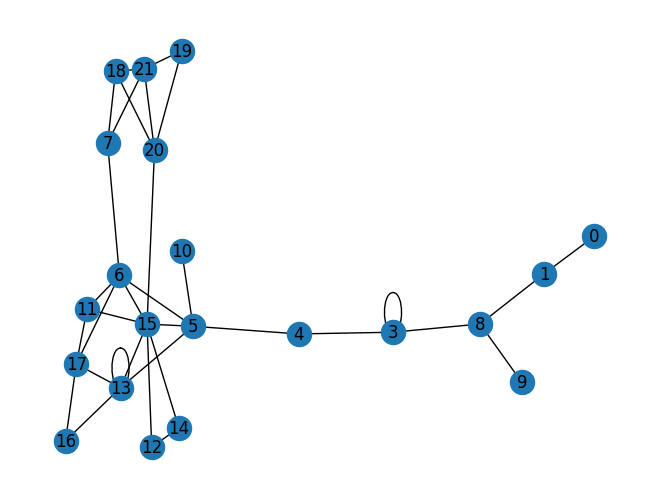

In [130]:
import matplotlib.pyplot as plt
nx.draw(G, with_labels = True)

In [131]:
print(G.nodes['1']['group'])

convo


In [132]:
from pyvis import network as net 

g = net.Network(notebook=True,cdn_resources='in_line')

g.from_nx(G)
#g.show_buttons()
g.show('/home/qnc/Downloads/output.html')

/home/qnc/Downloads/output.html


In [133]:
s = Sigma(G, node_size= G.degree)
s.save_as_html('/home/qnc/Downloads/output.html')

AttributeError: 'Sigma' object has no attribute 'save_as_html'